<a href="https://colab.research.google.com/github/dvircohen0/projects/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd
import os

In [27]:
df = pd.read_csv('/content/ChartData (1).csv')

In [29]:
cols=df.columns.tolist()

In [32]:
cols[2]

"מחזור (באלפי ש''ח) "

In [33]:
group=df.groupby("תאריך")
df=group[cols[2]].mean()
df.isnull().sum()

0

In [34]:
close_train=df.iloc[:len(df)-50]
close_test=df.iloc[len(close_train):]

In [35]:
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
close_scaled=scaler.fit_transform(close_train)

In [36]:
timestep=50
x_train=[]
y_train=[]

for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #reshaped for RNN
print("x_train shape= ",x_train.shape)
print("y_train shape= ",y_train.shape)

x_train shape=  (5140, 50, 1)
y_train shape=  (5140,)


In [37]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Flatten

model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
161/161 [==============================] - 18s 103ms/step - loss: 0.0012
Epoch 2/100
161/161 [==============================] - 17s 105ms/step - loss: 0.0012
Epoch 3/100
161/161 [==============================] - 17s 103ms/step - loss: 0.0011
Epoch 4/100
161/161 [==============================] - 17s 106ms/step - loss: 0.0012
Epoch 5/100
161/161 [==============================] - 17s 105ms/step - loss: 0.0012
Epoch 6/100
161/161 [==============================] - 17s 106ms/step - loss: 0.0011
Epoch 7/100
161/161 [==============================] - 17s 105ms/step - loss: 0.0014
Epoch 8/100
161/161 [==============================] - 17s 103ms/step - loss: 0.0011
Epoch 9/100
161/161 [==============================] - 17s 104ms/step - loss: 9.0887e-04
Epoch 10/100
161/161 [==============================] - 17s 106ms/step - loss: 9.7539e-04
Epoch 11/100
161/161 [==============================] - 17s 106ms/step - loss: 8.8943e-04
Epoch 12/100
161/161 [=============================

In [38]:
inputs=df[len(df)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [39]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [40]:
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

In [41]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

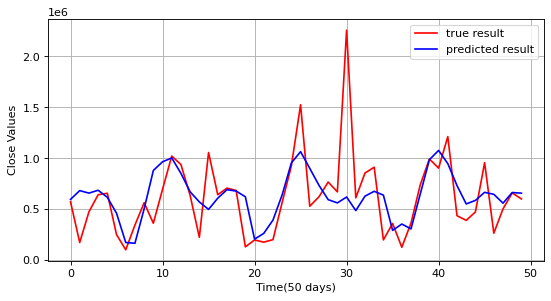

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(50 days)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()